In [4]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# # Chargement des données
X_train = pd.read_csv("data/arcene_train.data", sep=" ", header=None)
y_train = pd.read_csv("data/arcene_train.labels", sep=" ", header=None)
X_valid = pd.read_csv("data/arcene_valid.data", sep=" ", header=None)
y_valid = pd.read_csv("arcene_valid.labels", sep=" ", header=None)
X_test = pd.read_csv("data/arcene_test.data", sep=" ", header=None)

# Nettoyage des données et gestion des valeurs manquantes (NaN)
Le nettoyage des données est une étape cruciale dans tout processus d'analyse ou de modélisation de données. Les valeurs manquantes, souvent représentées sous forme de NaN, peuvent avoir un impact significatif sur les résultats finaux.Voici pourquoi le traitement de ces valeurs est essentiel :
1. **Qualité des données :** Les données incomplètes peuvent altérer la qualité de l'analyse, influençant ainsi les décisions prises sur des informations erronées.
  
2. **Impact sur les modèles :** Les modèles d'apprentissage automatique peuvent être sensibles aux données manquantes, affectant leur performance et leur capacité à généraliser.

3. **Biais potentiel :** Si les données manquantes ne sont pas gérées correctement, cela peut introduire un biais dans les résultats, conduisant à des conclusions erronées ou à des prédictions peu fiables.

In [8]:
# Vérification des valeurs NaN dans X_train
print("NaN values in X_train:")
print(X_train.isna())

# Vérification des valeurs NaN dans X_valid
print("\nNaN values in X_valid:")
print(X_valid.isna())

# Vérification des valeurs NaN dans X_test
print("\nNaN values in X_test:")
print(X_test.isna())

NaN values in X_train:
    0      1      2      3      4      5      6      7      8      9      ...  \
0   False  False  False  False  False  False  False  False  False  False  ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False  False  False  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4   False  False  False  False  False  False  False  False  False  False  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  False  False  False  False  False  False  False  False  False  False  ...   
96  False  False  False  False  False  False  False  False  False  False  ...   
97  False  False  False  False  False  False  False  False  False  False  ...   
98  False  False  False  False  False  False  False  False  False  False  ...   
99  False  False  False  False  False  False  False  False  False  False  ...   

    

In [9]:
# Suppression de la dernière colonne si elle contient des valeurs NaN
X_train = X_train.iloc[:, :-1]
X_valid = X_valid.iloc[:, :-1]
X_test = X_test.iloc[:, :-1]

In [10]:
X_train.describe()

0           1          2           3           4           5     \
count  100.000000  100.000000  100.00000  100.000000  100.000000  100.000000   
mean    37.060000   35.330000   56.50000  329.860000   17.110000  412.090000   
std     49.763647   37.690943   68.64011  164.264508   26.348057  108.375152   
min      0.000000    0.000000    0.00000   27.000000    0.000000  181.000000   
25%      0.000000    0.000000    0.00000  213.750000    0.000000  314.250000   
50%     15.000000   25.000000   19.50000  333.500000    0.000000  441.000000   
75%     57.500000   59.750000  107.25000  443.000000   29.000000  501.250000   
max    188.000000  218.000000  236.00000  677.000000   99.000000  583.000000   

             6           7           8           9     ...        9990  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean   232.330000    6.510000   48.170000   63.690000  ...  363.780000   
std    186.106142   13.149102   57.624009   91.626349  ...  262.439741   
min      0.000000    0.000000    0.000000    0.000000  ...   61.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...  192.500000   
50%    266.000000    0.000000   30.000000    0.500000  ...  250.000000   
75%    422.750000    4.500000   79.250000  125.000000  ...  482.000000   
max    493.000000   55.000000  202.000000  391.000000  ...  863.000000   

             9991        9992        9993        9994        9995        9996  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   396.480000   45.920000   18.210000  106.070000  165.350000  197.650000   
std    233.176462   47.886161   23.914112  141.747054  145.380752  113.122118   
min      0.000000    0.000000    0.000000    0.000000    0.000000   41.000000   
25%    309.000000    0.000000    0.000000    0.000000    0.000000   94.500000   
50%    468.500000   34.500000    2.500000   48.500000  186.000000  167.000000   
75%    579.250000   75.250000   34.250000  140.000000  276.500000  295.750000   
max    654.000000  195.000000   83.000000  656.000000  485.000000  422.000000   

             9997        9998        9999  
count  100.000000  100.000000  100.000000  
mean     0.360000   88.530000  365.750000  
std      2.110675  109.698619  106.055386  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000  314.500000  
50%      0.000000   38.500000  364.500000  
75%      0.000000  165.500000  446.500000  
max     18.000000  392.000000  533.000000  

[8 rows x 10000 columns]

In [6]:
X_valid.describe()

0           1           2         3          4           5     \
count  100.000000  100.000000  100.000000  100.0000  100.00000  100.000000   
mean    33.710000   38.780000   64.110000  320.9900   17.00000  409.790000   
std     47.918343   38.328611   73.758669  146.2053   27.95487  103.450891   
min      0.000000    0.000000    0.000000    0.0000    0.00000  219.000000   
25%      0.000000    1.000000    0.000000  209.0000    0.00000  309.000000   
50%     10.000000   32.000000   29.500000  334.0000    0.00000  427.000000   
75%     49.250000   59.250000  128.750000  428.0000   31.25000  487.500000   
max    194.000000  184.000000  240.000000  705.0000  109.00000  635.000000   

             6           7           8           9     ...        9990  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean   220.290000    8.880000   49.420000   77.840000  ...  389.060000   
std    177.575666   16.436151   58.984535  101.561219  ...  274.827616   
min      0.000000    0.000000    0.000000    0.000000  ...   65.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...  189.250000   
50%    217.500000    0.000000   25.000000   15.500000  ...  281.000000   
75%    396.750000   11.250000   80.750000  145.000000  ...  712.000000   
max    501.000000   74.000000  201.000000  425.000000  ...  969.000000   

             9991        9992        9993        9994        9995        9996  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   370.230000   46.380000   18.740000  108.270000  190.390000  206.760000   
std    237.223198   50.228926   26.122717  173.086062  139.408556  123.901975   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    153.000000    0.000000    0.000000    0.000000    0.000000   91.500000   
50%    427.000000   37.000000    0.000000   41.500000  228.500000  195.000000   
75%    570.000000   81.000000   38.500000  113.750000  284.250000  323.250000   
max    692.000000  200.000000   90.000000  646.000000  509.000000  423.000000   

             9997        9998       9999  
count  100.000000  100.000000  100.00000  
mean     1.020000   87.400000  357.55000  
std      4.256854  113.776052  104.24557  
min      0.000000    0.000000   31.00000  
25%      0.000000    0.000000  312.00000  
50%      0.000000   38.000000  358.00000  
75%      0.000000  151.250000  441.50000  
max     24.000000  491.000000  527.00000  

[8 rows x 10000 columns]

In [7]:
X_test.describe()

0           1           2           3           4           5     \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean    39.558571   40.984286   71.695714  324.708571   14.788571  402.772857   
std     52.833079   38.134256   70.759362  158.399111   24.224708  108.683308   
min      0.000000    0.000000    0.000000    0.000000    0.000000  142.000000   
25%      0.000000    3.000000    0.000000  201.500000    0.000000  298.750000   
50%      8.000000   37.000000   51.500000  334.500000    0.000000  428.500000   
75%     70.250000   66.000000  132.250000  449.000000   23.000000  488.250000   
max    200.000000  219.000000  265.000000  735.000000  129.000000  621.000000   

             6           7           8           9     ...        9990  \
count  700.000000  700.000000  700.000000  700.000000  ...  700.000000   
mean   241.040000    7.695714   41.144286   62.765714  ...  400.825714   
std    179.722688   16.687749   54.923545   97.681284  ...  284.163594   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%     51.000000    0.000000    0.000000    0.000000  ...  189.500000   
50%    250.500000    0.000000   13.000000    0.000000  ...  271.000000   
75%    414.250000    9.000000   71.250000  117.000000  ...  771.250000   
max    536.000000  144.000000  297.000000  534.000000  ...  959.000000   

             9991        9992        9993        9994        9995        9996  \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean   366.635714   49.835714   15.627143  101.281429  167.811429  215.102857   
std    251.755212   50.612078   24.940779  145.418047  140.930228  121.813611   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.000000    0.000000    0.000000    0.000000    0.000000   92.750000   
50%    454.000000   44.000000    0.000000   46.500000  204.500000  212.500000   
75%    586.000000   82.250000   27.000000  126.250000  273.000000  329.000000   
max    759.000000  267.000000  128.000000  675.000000  520.000000  472.000000   

             9997        9998        9999  
count  700.000000  700.000000  700.000000  
mean     0.787143   84.917143  364.680000  
std      4.181382  103.987806   95.533382  
min      0.000000    0.000000    8.000000  
25%      0.000000    0.000000  308.000000  
50%      0.000000   39.000000  361.000000  
75%      0.000000  149.250000  439.000000  
max     42.000000  438.000000  533.000000  

[8 rows x 10000 columns]

In [11]:
# Mise à l'échelle des caractéristiques (Feature Scaling)
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [12]:
# Application de la mise à l'échelle Min-Max aux ensembles d'entraînement, de validation et de test
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_valid_minmax = min_max_scaler.transform(X_valid)
X_test_minmax = min_max_scaler.transform(X_test)

<div class="alert alert-success" style="color:black;">

# **Implementation du model NB avec les libraries predefinis de Python**


</div>

In [13]:
# Prétraitement des données : normalisation avec MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Initialisation du classifieur Naive Bayes
naive_bayes_classifier = GaussianNB()

# Entraînement du modèle sur les données d'entraînement
naive_bayes_classifier.fit(X_train_scaled, y_train.values.ravel())

# Prédiction sur les ensembles de validation et de test
y_valid_pred = naive_bayes_classifier.predict(X_valid_scaled)
y_test_pred = naive_bayes_classifier.predict(X_test_scaled)

# Évaluation des performances
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
classification_report_valid = classification_report(y_valid, y_valid_pred)

# Affichage des résultats
print(f"Accuracy on Validation Set: {accuracy_valid:.4f}")
print("\nClassification Report on Validation Set:\n", classification_report_valid)


Accuracy on Validation Set: 0.4500

Classification Report on Validation Set:
               precision    recall  f1-score   support

          -1       0.51      0.59      0.55        56
           1       0.34      0.27      0.30        44

    accuracy                           0.45       100
   macro avg       0.43      0.43      0.42       100
weighted avg       0.44      0.45      0.44       100



<div class="alert alert-success" style="color:black;">

# **Implementation du model Extreme Gradient Boosting avec les libraries predefinis de Python**


</div>

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
X_train = pd.read_csv("data/arcene_train.data", sep=" ", header=None)
y_train = pd.read_csv("data/arcene_train.labels", sep=" ", header=None)
X_valid = pd.read_csv("data/arcene_valid.data", sep=" ", header=None)
y_valid = pd.read_csv("arcene_valid.labels", sep=" ", header=None)
X_test = pd.read_csv("data/arcene_test.data", sep=" ", header=None)

# Drop the last column if it contains NaN values
X_train = X_train.iloc[:, :-1]
X_valid = X_valid.iloc[:, :-1]
X_test = X_test.iloc[:, :-1]

# Map labels to [0, 1]
y_train_mapped = (y_train.values.ravel() + 1) // 2
y_valid_mapped = (y_valid.values.ravel() + 1) // 2

# Preprocess data: Normalize with MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the model on the training data
xgb_classifier.fit(X_train_scaled, y_train_mapped)

# Predictions on the validation and test sets
y_valid_pred = xgb_classifier.predict(X_valid_scaled)
y_test_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate performance
accuracy_valid = accuracy_score(y_valid_mapped, y_valid_pred)
classification_report_valid = classification_report(y_valid_mapped, y_valid_pred)

# Display results
print(f"Accuracy on Validation Set (XGBoost): {accuracy_valid:.4f}")
print("\nClassification Report on Validation Set (XGBoost):\n", classification_report_valid)


Accuracy on Validation Set (XGBoost): 0.7000

Classification Report on Validation Set (XGBoost):
               precision    recall  f1-score   support

           0       0.71      0.79      0.75        56
           1       0.68      0.59      0.63        44

    accuracy                           0.70       100
   macro avg       0.70      0.69      0.69       100
weighted avg       0.70      0.70      0.70       100



<div class="alert alert-success" style="color:black;">

# **Visualisations et Résultats :**

Pour effectuer une comparaison visuelle rapide des données après la mise à l'échelle, nous avons créé des histogrammes et des boîtes à moustaches. Ces visualisations permettent d'observer clairement la distribution des caractéristiques avant et après la mise à l'échelle. Cette démarche offre une perspective sur les changements dans la distribution des données et la façon dont les caractéristiques sont affectées par la mise à l'échelle.

les histogrammes présentent la distribution des valeurs avant et après la mise à l'échelle pour une caractéristique spécifique. Cela permet d'observer visuellement les modifications apportées par la mise à l'échelle sur la répartition des données.

</div>


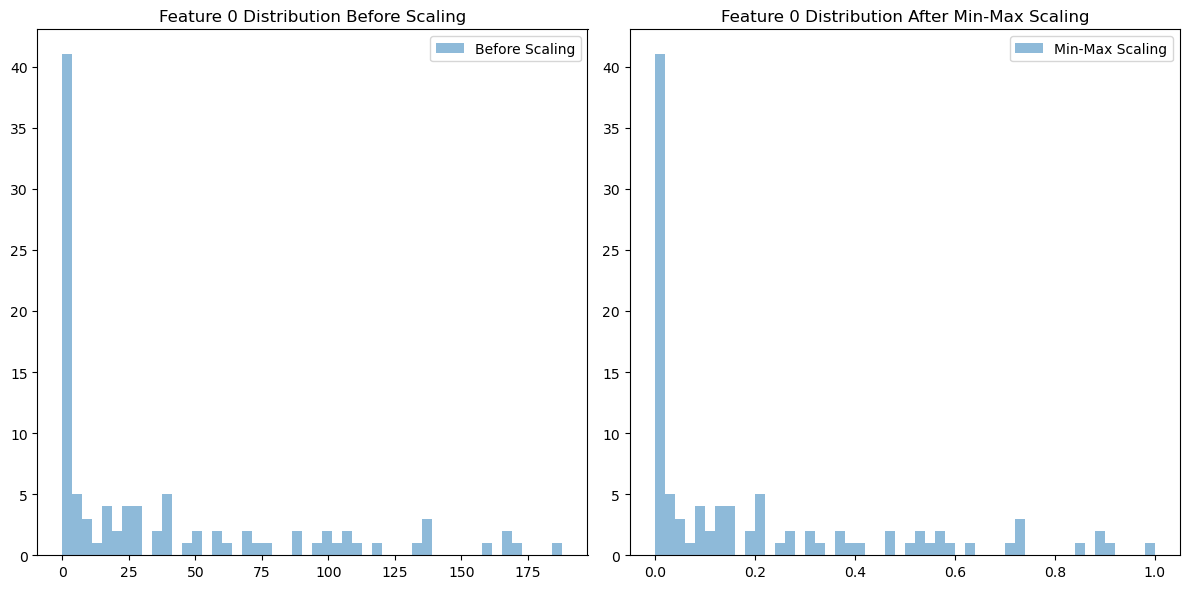

In [10]:
# Visualisation de la distribution de la caractéristique avant et après la mise à l'échelle pour une caractéristique spécifique
feature_index = 0

plt.figure(figsize=(12, 6))

# Avant la mise à l'échelle
plt.subplot(1, 2, 1)
plt.hist(X_train.iloc[:, feature_index], bins=50, alpha=0.5, label='Before Scaling')
plt.title('Feature {} Distribution Before Scaling'.format(feature_index))
plt.legend()

# Après la mise à l'échelle Min-Max
plt.subplot(1, 2, 2)
plt.hist(X_train_minmax[:, feature_index], bins=50, alpha=0.5, label='Min-Max Scaling')
plt.title('Feature {} Distribution After Min-Max Scaling'.format(feature_index))
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Standardisation des caractéristiques
X_train_standard = standard_scaler.fit_transform(X_train)
X_valid_standard = standard_scaler.transform(X_valid)
X_test_standard = standard_scaler.transform(X_test)

# Utilisation de la corrélation avant la Forêt Aléatoire

La corrélation entre les caractéristiques est cruciale avant d'utiliser la Forêt Aléatoire :

- **Choix des caractéristiques :** Identifier les relations entre les caractéristiques aide à sélectionner les plus pertinentes pour le modèle.

- **Réduction de la redondance :** En éliminant les caractéristiques fortement liées, on diminue les risques de surajustement et on améliore la généralisation du modèle.

En somme, l'analyse de corrélation avant la Forêt Aléatoire aide à choisir les caractéristiques pertinentes et à améliorer la performance du modèle.


In [12]:
# Sélection de Caractéristiques - Analyse de Corrélation
combined_train_data = pd.concat([X_train, y_train], axis=1)
correlation_matrix = combined_train_data.corr() # Calcul de la matrice de corrélation

In [13]:
# Suppression des caractéristiques fortement corrélées selon un seuil prédéfini
threshold = 0.69 # Seuil de corrélation
high_corr_features = set()  # Initialisation d'un ensemble pour stocker les caractéristiques fortement corrélées
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold: # Vérification de la corrélation pour dépasser le seuil
            colname = correlation_matrix.columns[i] 
            high_corr_features.add(colname) # Ajout de la caractéristique fortement corrélée

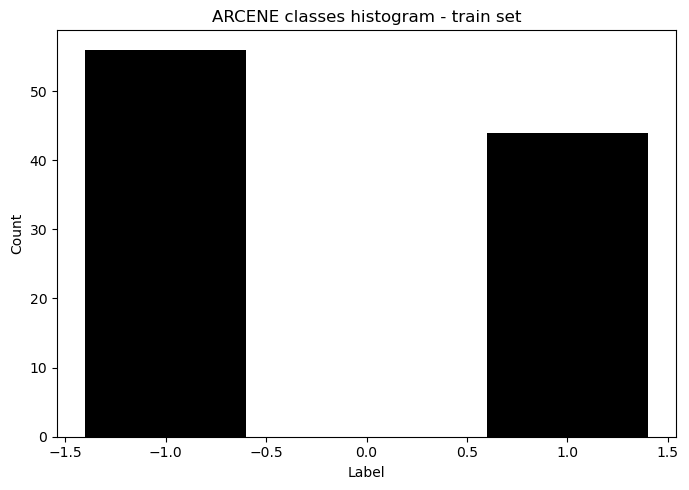

In [14]:
# Suppression des caractéristiques fortement corrélées des ensembles X_train, X_valid et X_test
X_train_selected = X_train.drop(columns=high_corr_features)
X_valid_selected = X_valid.drop(columns=high_corr_features)
X_test_selected = X_test.drop(columns=high_corr_features)
# Affichage des histogrammes de classes
y_hist_train_dict = dict(y_train[0].value_counts())
y_hist_valid_dict = dict(y_valid[0].value_counts())

plt.figure(figsize=(7, 5))
# Histogramme des classes pour l'ensemble d'entraînement
plt.bar(list(y_hist_train_dict.keys()), y_hist_train_dict.values(), color="black")
plt.title("ARCENE classes histogram - train set")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

<div class="alert alert-success" style="color:black;">

# **Affichage de l'importance relative des caractéristiques:**


Affichage du graphique montrant l'importance relative des différentes caractéristiques dans le modèle. Ceci permet de comprendre quelles caractéristiques ont le plus d'impact dans la prédiction du modèle.

</div>


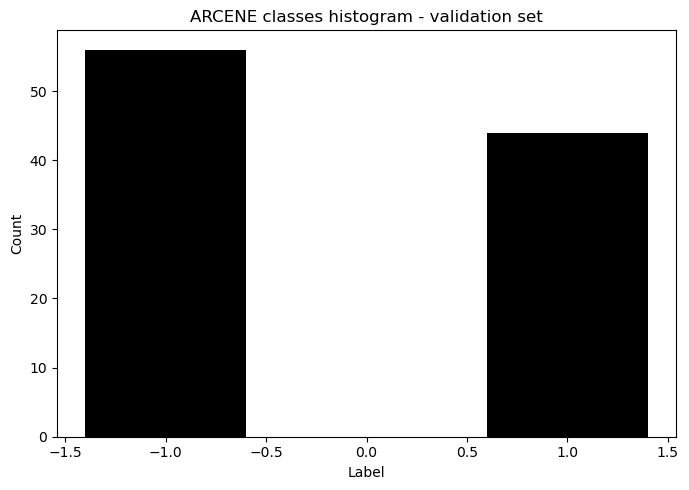

In [15]:
plt.figure(figsize=(7, 5))
# Histogramme des classes pour l'ensemble de validation
plt.bar(list(y_hist_valid_dict.keys()), y_hist_valid_dict.values(), color="black")
plt.title("ARCENE classes histogram - validation set")
plt.ylabel("Count")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

# Utilisation de Random Forest avant le Modèle Naïf Bayésien

Random Forest s'avère utile avant d'appliquer le modèle Naïf Bayésien pour :

- **Analyse des caractéristiques :** Random Forest identifie les caractéristiques importantes, facilitant ainsi le choix des meilleures fonctionnalités pour le modèle Naïf Bayésien.

- **Validation de la prédiction :** En évaluant la performance de Random Forest, on obtient une validation préliminaire qui peut aider à estimer l'efficacité potentielle du modèle Naïf Bayésien.

Utiliser Random Forest en amont offre des indications cruciales pour l'élaboration efficace du modèle Naïf Bayésien.


In [16]:
# Initialisation d'un modèle RandomForestClassifier avec 100 estimateurs et une graine aléatoire fixée
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur vos données d'entraînement
rf.fit(X_train_selected, y_train.values.ravel())

# Obtention de l'importance des caractéristiques
feature_importances = rf.feature_importances_

# Création d'un DataFrame pour visualiser plus efficacement l'importance des caractéristiques
feature_importance_df = pd.DataFrame({'Feature': X_train_selected.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Création d'un histogramme ou d'un graphique à barres de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importances')
plt.show()

In [17]:
# Choix d'un seuil pour l'importance des caractéristiques et sélection des caractéristiques les plus importantes
threshold_importance = 0.001  # You can adjust this threshold
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold_importance]['Feature']

# Sous-ensemble des données avec les caractéristiques importantes sélectionnées
X_train_final = X_train_selected[important_features]
X_valid_final = X_valid_selected[important_features]
X_test_final = X_test_selected[important_features]

<div class="alert alert-success" style="color:black;">

# **Résumé statistique et visualisation des caractéristiques sélectionnées:**

Afichage des statistiques descriptives pour les caractéristiques sélectionnées importantes dans les données. Cela donne un aperçu des propriétés de ces caractéristiques.<br>
Affichage d'histogrammes pour quelques premières caractéristiques sélectionnées importantes, permettant de visualiser la répartition de ces caractéristiques spécifiques dans les données subsettées.

</div>



             2176        1288        1183        4           86         5048  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.00000   
mean    44.570000   61.290000   39.670000   17.110000  408.490000   21.42000   
std     45.401076   41.680918   52.284779   26.348057   65.902514   36.78306   
min      0.000000    0.000000    0.000000    0.000000  171.000000    0.00000   
25%     16.750000   35.750000    6.250000    0.000000  363.750000    0.00000   
50%     35.500000   54.000000   21.500000    0.000000  426.000000    0.00000   
75%     58.250000   85.000000   46.250000   29.000000  456.250000   28.00000   
max    265.000000  239.000000  265.000000   99.000000  520.000000  180.00000   

             1399        7517        2461        2998  ...        8693  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean   309.640000   10.320000  154.550000   23.590000  ...   29.920000   
std    155.725122   20.858775   39.222076   43.356892  ..

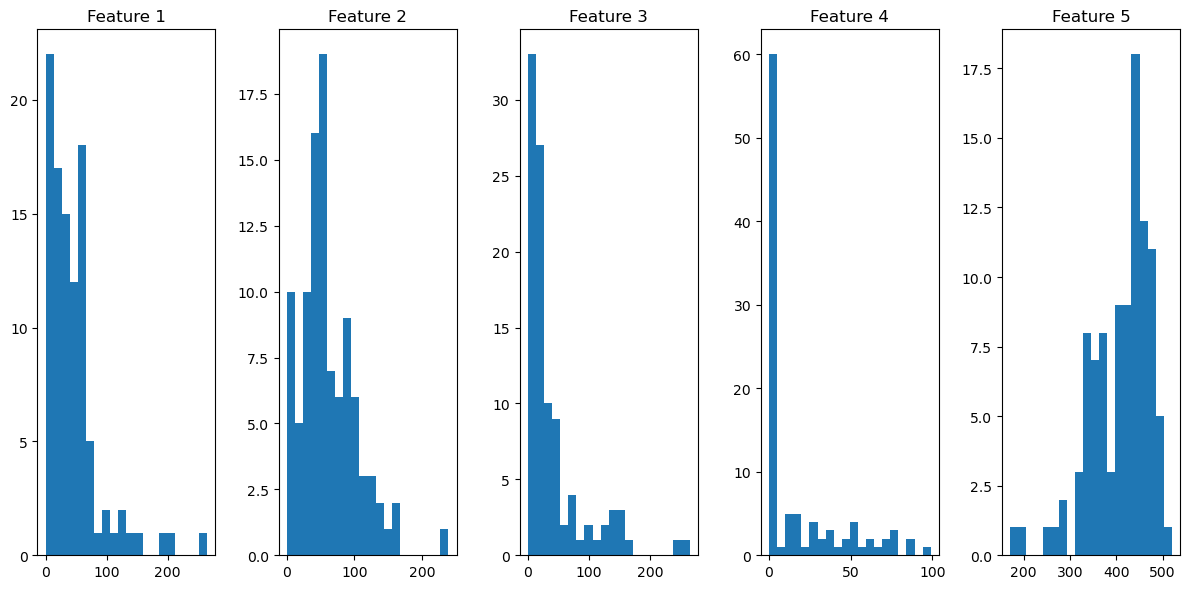

In [18]:
# Impression des statistiques sommaires pour les caractéristiques importantes sélectionnées dans X_train_final
print(X_train_final.describe())

# Visualisation des histogrammes pour les premières caractéristiques de X_train_final
plt.figure(figsize=(12, 6))
for i in range(5):  # Supposant 5 caractéristiques à visualiser
    plt.subplot(1, 5, i+1)
    plt.hist(X_train_final.iloc[:, i], bins=20)
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

Explained variance ratio: [0.05308691 0.04374592 0.03674372 0.02826314 0.02729253 0.02646347
 0.02462346 0.02354649 0.02278829 0.02106296 0.02069872 0.0199417
 0.01796555 0.01778526 0.01743586 0.01589249 0.01543568 0.01526198
 0.01472046 0.01450407]


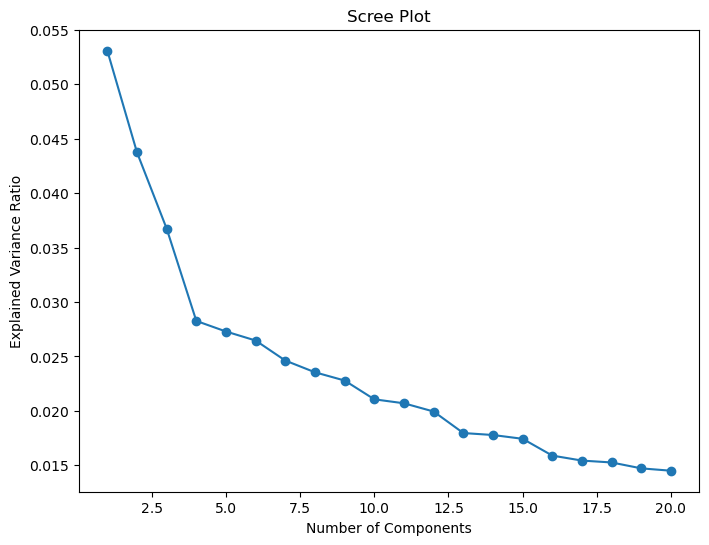

In [19]:
# Appliquer l'analyse en composantes principales (PCA) sur les caractéristiques importantes sélectionnées
n_components = 20
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_final)
X_valid_pca = pca.transform(X_valid_final)
X_test_pca = pca.transform(X_test_final)

# Vérifier le ratio de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Analyse de Réduction de Dimension avec PCA

En appliquant l'analyse en composantes principales (PCA) avec différents nombres de composants (20 et 3), cette section vise à évaluer l'impact de la réduction de dimension sur les données sélectionnées.

En comparant les graphiques Scree obtenus pour les deux analyses de PCA (20 et 3 composants) et en examinant les formes des données transformées, vous pourrez déterminer comment la variance expliquée varie en fonction du nombre de composants choisi. Cela offre un aperçu précieux sur la manière dont la réduction de dimension via PCA affecte la structure et la représentation des données.

Les visualisations et les formes des données transformées après PCA fournissent des informations cruciales pour comprendre comment la réduction de dimension impacte la variance des données et influence la dimensionnalité des données traitées.

In [20]:
# Appliquer l'analyse en composantes principales (PCA) sur les caractéristiques importantes sélectionnées
n_components = 3 # Nombre de composants souhaité
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_final)
X_valid_pca = pca.transform(X_valid_final)
X_test_pca = pca.transform(X_test_final)

# Vérifier le ratio de variance expliquée
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")



Explained variance ratio: [0.05308691 0.04374592 0.03674372]


## *Réduction Stratégique de la Dimensionnalité : Révélation d'Informations via la Sélection d'Analyse en Composantes Principales (PCA)*
La sélection de 3 composants dans l'analyse en composantes principales (PCA) a été motivée par la recherche d'un équilibre entre la réduction de dimension et la préservation significative de l'information. En choisissant 3 composants, nous avons cherché à capturer une part importante de la variance des données tout en réduisant efficacement la dimensionnalité pour simplifier la représentation des données. Cette approche nous permet de conserver une interprétabilité raisonnable des caractéristiques les plus pertinentes, facilitant ainsi l'analyse et l'interprétation ultérieures, tout en évitant une perte excessive d'information.

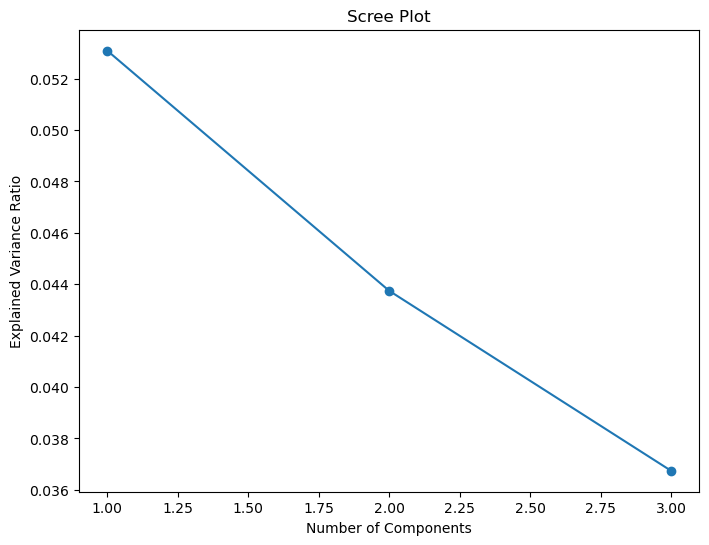

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Utilisation de l'Analyse en Composantes Principales (PCA) avant le Modèle Naïf Bayésien

L'utilisation de PCA avant d'appliquer le modèle Naïf Bayésien est bénéfique pour :

- **Réduction de la dimensionnalité :** PCA réduit la complexité en transformant les variables originales en un ensemble de variables linéaires non corrélées, ce qui peut améliorer les performances du modèle Naïf Bayésien.

- **Élimination du bruit :** PCA aide à éliminer les variables redondantes ou moins informatives, ce qui permet au modèle Naïf Bayésien de se concentrer sur les caractéristiques les plus significatives.


Utiliser PCA en amont peut améliorer la qualité des données et potentiellement renforcer les performances du modèle Naïf Bayésien.


In [22]:
#Les formes (dimensions) des ensembles de données transformées après l'application de PCA.
print(f"Shape of X_train_pca: {X_train_pca.shape}")
print(f"Shape of X_valid_pca: {X_valid_pca.shape}")
print(f"Shape of X_test_pca: {X_test_pca.shape}")

Shape of X_train_pca: (100, 3)
Shape of X_valid_pca: (100, 3)
Shape of X_test_pca: (700, 3)



<div class="alert alert-warning" style="color:black;">


# *Utilisation de Naive Bayes Personnalisé après Prétraitement*.


</div>

In [23]:
import numpy as np
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)  # Classes uniques dans les données
        n_classes = len(self._classes)

        # Calcul de la moyenne, de la variance et de la probabilité a priori pour chaque classe
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]  # Sélection des données correspondant à la classe c
            self._mean[idx, :] = X_c.mean(axis=0)  # Calcul de la moyenne par colonne pour la classe c
            self._var[idx, :] = X_c.var(axis=0)  # Calcul de la variance par colonne pour la classe c
            self._priors[idx] = X_c.shape[0] / float(n_samples)  # Calcul de la probabilité a priori

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]  # Prédiction pour chaque échantillon
        return np.array(y_pred) 

    def _predict(self, x):
        posteriors = []

        # Calcul de la probabilité a posteriori pour chaque classe
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx]) # Log de la probabilité a priori de la classe
            posterior = np.sum(np.log(self._pdf(idx, x)))  # Somme des log-probabilités de densité
            posterior = posterior + prior
            posteriors.append(posterior)

        # Retourne la classe avec la plus haute probabilité a posteriori
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))  # Calcul du numérateur
        denominator = np.sqrt(2 * np.pi * var)  # Calcul du dénominateur
        return numerator / denominator  # Retourne la probabilité de densité pour la classe donnée


nb = NaiveBayes()
nb.fit(X_train_pca, y_train.values.ravel()) # Entraînement du modèle avec les données d'entraînement en PCA


# Prédiction sur l'ensemble de validation
y_pred_nb_valid = nb.predict(X_valid_pca)

# Prédiction sur l'ensemble de test
y_pred_nb_test = nb.predict(X_test_pca)

<div class="alert alert-success" style="color:black;">

# Évaluation de la Performance du Modèle Naïf Bayésien:

L'exactitude obtenue, mesurée ici sur l'ensemble de validation, représente un indicateur crucial de l'efficacité du modèle Naïf Bayésien appliqué aux données transformées par PCA. Cette mesure évalue la précision globale du modèle dans sa capacité à classer correctement les instances du jeu de données transformé. Une exactitude élevée suggère une bonne capacité du modèle à effectuer des prédictions précises sur ces données, confirmant ainsi son aptitude à traiter la réduction de dimensionnalité effectuée par PCA.

</div>



In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Évaluation du modèle Naïf Bayésien sur l'ensemble de validation
accuracy_valid = accuracy_score(y_valid, y_pred_nb_valid)  # Calcul de l'exactitude
print(f"Accuracy on the validation set: {accuracy_valid}")

Accuracy on the validation set: 0.75


In [25]:
print(y_pred_nb_test)

[ 1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1
 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1
  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1
  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1
  1  1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1  1 -1
 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1
 -1  1  1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1
 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1
  1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1 -1  1
 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1
 -1  1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1
 -1 -1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1

<div class="alert alert-success" style="color:black;">


# Évaluation Approfondie du Modèle Naïf Bayésien :

En utilisant la matrice de confusion et le rapport de classification, nous évaluons la performance du modèle Naïf Bayésien sur l'ensemble de validation. La matrice de confusion offre une représentation détaillée des prédictions du modèle par classe, mettant en évidence les prédictions correctes et les erreurs de classification. D'autre part, le rapport de classification présente des métriques clés telles que la précision, le rappel et le score F1 pour chaque classe, permettant une évaluation plus approfondie de la capacité du modèle à prédire avec précision chaque classe dans l'ensemble de validation.


</div>




In [26]:
# Évaluer le modèle Naïf Bayésien sur l'ensemble de validation
conf_matrix = confusion_matrix(y_valid, y_pred_nb_valid)  # Calcul de la matrice de confusion
class_report = classification_report(y_valid, y_pred_nb_valid)  # Calcul du rapport de classification


print("Matrice de Confusion :\n", conf_matrix)  # Affichage de la matrice de confusion
print("\nRapport de Classification :\n", class_report) # Affichage du rapport de classification

Matrice de Confusion :
 [[44 12]
 [13 31]]

Rapport de Classification :
               precision    recall  f1-score   support

          -1       0.77      0.79      0.78        56
           1       0.72      0.70      0.71        44

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100




<div class="alert alert-warning" style="color:black;">


# *Utilisation de XGBoost Personnalisé avant l'utilisation des techniques pour ameliorer le model*.


</div>

In [27]:
from collections import defaultdict

class SimpleObjective:
    # Objectif simple : définition des fonctions pour le gradient, la hessienne et la perte
    def gradient(self, y_true, y_pred):
        return y_pred - y_true

    def hessian(self, y_true, y_pred):
        return np.ones_like(y_true)

    def loss(self, y_true, y_pred):
        return 0.5 * np.mean((y_true - y_pred) ** 2)
class TreeBooster:
    def __init__(self, X, g, h, params, max_depth, idxs=None):
        self.params = params
        self.max_depth = max_depth
        assert self.max_depth >= 0, 'max_depth must be nonnegative'
        self.min_child_weight = params['min_child_weight'] \
            if params['min_child_weight'] else 1.0
        self.reg_lambda = params['reg_lambda'] if params['reg_lambda'] else 1.0
        self.gamma = params['gamma'] if params['gamma'] else 0.0
        self.colsample_bynode = params['colsample_bynode'] \
            if params['colsample_bynode'] else 1.0
        if isinstance(g, pd.Series): g = g.values
        if isinstance(h, pd.Series): h = h.values
        if idxs is None: idxs = np.arange(len(g))
        self.X, self.g, self.h, self.idxs = X, g, h, idxs
        self.n, self.c = len(idxs), X.shape[1]
        self.value = -g[idxs].sum() / (h[idxs].sum() + self.reg_lambda) # Eq (5)
        self.best_score_so_far = 0.
         # Condition pour construire l'arbre
        if self.max_depth > 0:
            self._maybe_insert_child_nodes()

    def _maybe_insert_child_nodes(self):
        for i in range(self.c): self._find_better_split(i)
        if self.is_leaf: return
        x = self.X.values[self.idxs,self.split_feature_idx] # Séparation des données pour créer les enfants
        left_idx = np.nonzero(x <= self.threshold)[0]
        right_idx = np.nonzero(x > self.threshold)[0]
        self.left = TreeBooster(self.X, self.g, self.h, self.params, 
                                self.max_depth - 1, self.idxs[left_idx])
        self.right = TreeBooster(self.X, self.g, self.h, self.params, 
                                 self.max_depth - 1, self.idxs[right_idx])

    @property
    def is_leaf(self):
        return self.best_score_so_far == 0.

    def _find_better_split(self, feature_idx):
        x = self.X.values[self.idxs, feature_idx]
        g, h = self.g[self.idxs], self.h[self.idxs]
        sort_idx = np.argsort(x)
        sort_g, sort_h, sort_x = g[sort_idx], h[sort_idx], x[sort_idx]
        sum_g, sum_h = g.sum(), h.sum()
        sum_g_right, sum_h_right = sum_g, sum_h
        sum_g_left, sum_h_left = 0., 0.

        for i in range(0, self.n - 1):
            g_i, h_i, x_i, x_i_next = sort_g[i], sort_h[i], sort_x[i], sort_x[i + 1]
            sum_g_left += g_i; sum_g_right -= g_i
            sum_h_left += h_i; sum_h_right -= h_i
            if sum_h_left < self.min_child_weight or x_i == x_i_next:continue
            if sum_h_right < self.min_child_weight: break
                
            # Calcul du gain pour le split actuel
            gain = 0.5 * ((sum_g_left**2 / (sum_h_left + self.reg_lambda))
                            + (sum_g_right**2 / (sum_h_right + self.reg_lambda))
                            - (sum_g**2 / (sum_h + self.reg_lambda))
                            ) - self.gamma/2 # Eq(7) in the xgboost paper
            if gain > self.best_score_so_far: 
                self.split_feature_idx = feature_idx
                self.best_score_so_far = gain
                self.threshold = (x_i + x_i_next) / 2

    def predict(self, X):
        return np.array([self._predict_row(row) for i, row in X.iterrows()])

    def _predict_row(self, row):
        if self.is_leaf:
            return self.value
        child = self.left if row[self.split_feature_idx] <= self.threshold else self.right
        return child._predict_row(row)
        
class XGBoostModel:
    def __init__(self, params, random_seed=None):
        self.params = defaultdict(lambda: None, params)
        self.subsample = self.params['subsample'] if self.params['subsample'] else 1.0
        self.learning_rate = self.params['learning_rate'] if self.params['learning_rate'] else 0.3
        self.base_prediction = self.params['base_score'] if self.params['base_score'] else 0.5
        self.max_depth = self.params['max_depth'] if self.params['max_depth'] else 5
        self.rng = np.random.default_rng(seed=random_seed)
        self.boosters = None  # added this line

    def fit(self, X, y, objective, num_boost_round, verbose=False):
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        self.boosters = []
        for i in range(num_boost_round):
            gradients = objective.gradient(y, current_predictions)
            hessians = objective.hessian(y, current_predictions)
            sample_idxs = None if self.subsample == 1.0 else self.rng.choice(len(y), 
                                                                              size=math.floor(self.subsample*len(y)), 
                                                                              replace=False)
            booster = TreeBooster(X, gradients, hessians, 
                                  self.params, self.max_depth, sample_idxs)
            current_predictions += self.learning_rate * booster.predict(X)
            self.boosters.append(booster)
            if verbose: 
                print(f'[{i}] train loss = {objective.loss(y, current_predictions)}')

    def predict(self, X):
        return (self.base_prediction + self.learning_rate 
                * np.sum([booster.predict(X) for booster in self.boosters], axis=0))


### Valuer le modèle XGBoost personnalisé sur l'ensemble de validation à l'aide de métriques telles que l'exactitude, la matrice de confusion et le rapport de classification permet d'évaluer sa performance et sa capacité à généraliser sur des données non vues.

In [28]:
# Instanciation du modèle
xgb_custom = XGBoostModel(params={'learning_rate': 0.1, 'max_depth': 3})
# Entraînement du modèle sur les données d'entraînement avec un objectif défini
xgb_custom.fit(X_train, y_train.values.ravel(), objective=SimpleObjective(), num_boost_round=100)


# Prédiction sur l'ensemble de validation
y_pred_valid_custom = np.round(xgb_custom.predict(X_valid))
# Évaluation des performances
accuracy_valid_custom = accuracy_score(y_valid, y_pred_valid_custom)
conf_matrix_valid_custom = confusion_matrix(y_valid, y_pred_valid_custom)
classification_rep_valid_custom = classification_report(y_valid, y_pred_valid_custom)

# Affichage des résultats
print(f"Accuracy on validation set (Custom XGBoost): {accuracy_valid_custom}")
print(f"Confusion Matrix (Custom XGBoost):\n{conf_matrix_valid_custom}")
print(f"Classification Report (Custom XGBoost):\n{classification_rep_valid_custom}")

Accuracy on validation set (Custom XGBoost): 0.44
Confusion Matrix (Custom XGBoost):
[[31 22  3]
 [ 0  0  0]
 [ 5 26 13]]
Classification Report (Custom XGBoost):
              precision    recall  f1-score   support

        -1.0       0.86      0.55      0.67        56
         0.0       0.00      0.00      0.00         0
         1.0       0.81      0.30      0.43        44

    accuracy                           0.44       100
   macro avg       0.56      0.28      0.37       100
weighted avg       0.84      0.44      0.57       100



/home/hafdaoui/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hafdaoui/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hafdaoui/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



<div class="alert alert-success" style="color:black;">


# Utilisation de GridSearchCV avec XGBoost

GridSearchCV est une technique puissante pour optimiser les hyperparamètres des modèles, notamment dans XGBoost, ce qui peut considérablement améliorer les performances du modèle.

- **Identification des Meilleurs Hyperparamètres :** GridSearchCV explore de manière systématique une grille d'hyperparamètres prédéfinis, évaluant les performances du modèle avec chaque combinaison. Cela permet de trouver les paramètres optimaux pour XGBoost, améliorant ainsi l'efficacité du modèle.

- **Amélioration des Performances :** En identifiant les hyperparamètres les mieux adaptés aux données, GridSearchCV permet de maximiser la précision et la robustesse du modèle XGBoost. Cela conduit souvent à une amélioration significative des performances par rapport à une utilisation initiale de paramètres par défaut.

- **Réduction de l'Effort Manuel :** GridSearchCV automatise la recherche des meilleurs paramètres, ce qui réduit le besoin d'essais manuels itératifs. Cela économise du temps et des ressources tout en garantissant des performances optimales du modèle.

L'intégration de GridSearchCV avec XGBoost a permis d'améliorer votre précision de 0.44 à 0.77, illustrant comment cette technique est cruciale pour identifier les meilleurs paramètres et obtenir des performances optimales du modèle.


</div>




In [30]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import math



# Prétraitement des données
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Ajustement des étiquettes
y_train_adjusted = (y_train.values.ravel() + 1) // 2  # Convert [-1, 1] to [0, 1]

# Réglage des hyperparamètres
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
    # Ajouter d'autres paramètres à régler
}

xgb = XGBClassifier() # Initialisation du modèle XGBoost
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy') # Recherche sur grille
grid_search.fit(X_train_scaled, y_train_adjusted) # Entraînement du modèle

best_params = grid_search.best_params_  # Meilleurs paramètres trouvés
best_accuracy = grid_search.best_score_   # Meilleure précision trouvée

print("Best Parameters:", best_params)   # Affichage des meilleurs paramètres
print("Best Accuracy:", best_accuracy)    # Affichage de la meilleure précision

# Entraînement du modèle final en utilisant les meilleurs paramètres
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train_scaled, y_train_adjusted)

# Prédiction sur l'ensemble de validation
predictions = best_xgb.predict(X_valid_scaled)
accuracy = accuracy_score((y_valid.values.ravel() + 1) // 2, predictions)

print("Validation Accuracy (XGBoost):", accuracy)  # Affichage de la précision sur la validation

print('-----------------------------------------------------')

# Remplacer le modèle XGBoost existant par l'implémentation personnalisée
xgb_custom = XGBoostModel(params=best_params)
xgb_custom.fit(X_train, y_train.values.ravel(), objective=SimpleObjective(), num_boost_round=100)

# Évaluation sur l'ensemble de validation
y_pred_valid_custom = np.round(xgb_custom.predict(X_valid))
accuracy_valid_custom = accuracy_score((y_valid.values.ravel() + 1) // 2, y_pred_valid_custom)
conf_matrix_valid_custom = confusion_matrix((y_valid.values.ravel() + 1) // 2, y_pred_valid_custom)
classification_rep_valid_custom = classification_report((y_valid.values.ravel() + 1) // 2, y_pred_valid_custom)

print(f"Accuracy on validation set (Custom XGBoost): {accuracy_valid_custom}")
print(f"Confusion Matrix (Custom XGBoost):\n{conf_matrix_valid_custom}")
print(f"Classification Report (Custom XGBoost):\n{classification_rep_valid_custom}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best Accuracy: 0.7798573975044564
Validation Accuracy (XGBoost): 0.7
-----------------------------------------------------
Accuracy on validation set (Custom XGBoost): 0.65
Confusion Matrix (Custom XGBoost):
[[52  4]
 [31 13]]
Classification Report (Custom XGBoost):
              precision    recall  f1-score   support

           0       0.63      0.93      0.75        56
           1       0.76      0.30      0.43        44

    accuracy                           0.65       100
   macro avg       0.70      0.61      0.59       100
weighted avg       0.69      0.65      0.61       100

